# Support Vector Machines
## 1. The Mathematical Definition
### 1.1 Logistic Regression as a starting point
A cornerstone of Logisitic Regression is the sigmoid function defined as follows: 
$\begin{align}
S(x) = \frac{1}{1 +  e^{-x}}
\end{align}$
The sigmoid function can be plotted with following code:

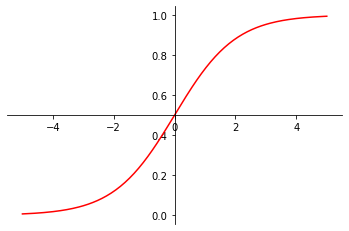

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 200 linearly spaced numbers

x = np.linspace(-5, 5, 200)

# the sigmoid function
y = 1 / (1 + np.exp(-x))

# setting the plot parameters 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, y, 'r')
plt.show()

The logistic regression's cost function is expressed as follows: 
$\begin{align} \tag{1}
    J(\theta) = -\frac{1}{m} \cdot \sum _{i=1}^{m} [y ^ {(i)} \cdot \log(h_{\theta} (x)) + (1 - y) \cdot \log(1 - h_{\theta} (x))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j ^ 2 
\end{align}$
Let's consider the first part:

$\begin{align} \tag{2}
    - y  \cdot \log(\frac{1}{1 +  e^{-\theta ^ T \cdot x}}) - (1 - y) \cdot \log(1 - \frac{1}{1 +  e^{-\theta ^ T \cdot x}})  
\end{align}$

More precisely: 
$\begin{align} \tag{3}
    f_1(z) = - log(\frac{1}{1 +  e^{-z}}) = log(1 +  e^{-z})  
\end{align}$
whose plot is as follows:

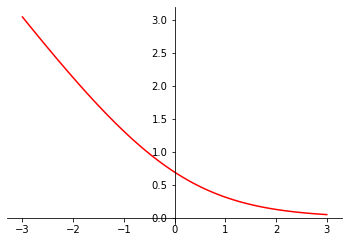

In [2]:
# 200 linearly spaced numbers

x = np.linspace(-3, 3, 100)

# the sigmoid function
y = np.log(1 + np.exp(-x))

# setting the plot parameters 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, y, 'r')
plt.show()

as well as
$\begin{align}
f_2(z) = -\log(1 - \frac{1}{1 +  e^{-z}}) = \log(1 + e^{z} )
\end{align}$
whose plot is as follows:

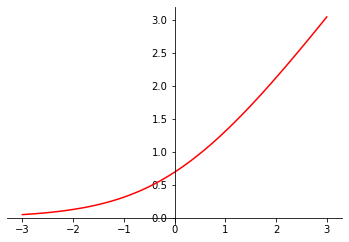

In [3]:
# 200 linearly spaced numbers

x = np.linspace(-3, 3, 100)

# the sigmoid function
y = - np.log(1 - 1 / (1 + np.exp(-x)))

# setting the plot parameters 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, y, 'r')
plt.show()

SVM  introduce a new cost function:
$\begin{align}
    J(\theta) = -\frac{1}{m} \cdot \sum _{i=1}^{m} [y ^ {(i)} \cdot c_1(\theta^T x) + (1 - y) \cdot c_2(\theta^T x)]  
\end{align}$
where $c_1(z)$ is plotted as follows with respect to $f_1(z)$


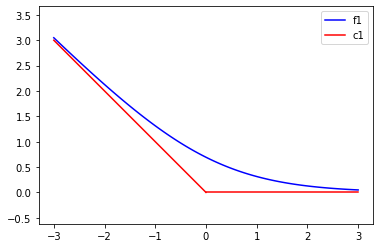

In [4]:
# 200 linearly spaced numbers
x1 = np.linspace(-3, 3, 100)

# function z_1
y1 = np.log(1 + np.exp(-x1))

# function c1, part 1

x2 = np.linspace(0, 3, 100)
y2 = np.array([0 for x in x2 ])

# function c1, part 2

x3 = np.linspace(-3, 0, 100)
y3 = -x3


fig, ax = plt.subplots()
ax.plot(x1, y1, 'b', label='f1')
ax.plot(x2, y2, 'r', label='c1')
ax.plot(x3, y3, 'r')
ax.axis('equal')
leg = ax.legend();

plt.show()

and the function $c_2(z)$ can be plotted with respect to $f_2(z)$ as follows:

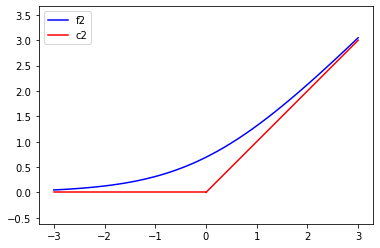

In [5]:
# 200 linearly spaced numbers
x1 = np.linspace(-3, 3, 100)

# function z_1
y1 = np.log(1 + np.exp(x1))

# function c1, part 1

x2 = np.linspace(-3, 0, 100)
y2 = np.array([0 for x in x2 ])

# function c1, part 2

x3 = np.linspace(0, 3, 100)
y3 = x3


fig, ax = plt.subplots()
ax.plot(x1, y1, 'b', label='f2')
ax.plot(x2, y2, 'r', label='c2')
ax.plot(x3, y3, 'r')
ax.axis('equal')
leg = ax.legend();

plt.show()

### 1.2 Mathematical Intituion
The additional cost functions introduced in the previous sections are of the following general formula: 
$\begin{align}
f_1(x) = \begin{equation} %\tag{}
    \begin{cases}
      A\cdot x+b , ~ 0 < x \leq C \\
      0 , ~ otherwise
    \end{cases}
\end{equation}
\end{align}$
$\begin{align}
  f_2(x) = \begin{equation}% \tag{}
    \begin{cases}
      A \cdot x+b , ~ C < x \leq 0 \\
      0 , ~ otherwise
    \end{cases}
  \end{equation}
\end{align}$  

The final cost function can be written as follows: 
$\begin{align}
    J(\theta) = C \cdot \frac{1}{m} \cdot \sum _{i=1}^{m} [y ^ {(i)} \cdot c_1(\theta^T x) + (1 - y) \cdot c_2(\theta^T x)] + \sum_{j=1}^{n} \theta_j^2
\end{align}$
The algorithm tends to set $c_1(\theta^T x)$ and $c_2(\theta^T x)$ to $0$, which reduces the cost function to 
$\begin{align}
    J(\theta) = \sum_{j=1}^{n} \theta_j^2
\end{align}$
This reduction is reflected on the choice of decision boundries. (mainly in linearly separable spaces).
It is worth noting that such SVM are denoted as ***LINEAR KERNEL*** SVM or ***WITHOUT KERNEL*** SVM. 
#### 1.2.1 Additional Remarks 
The cost function used is denoted as ***hinge*** function. The main reason behind it is to eliminate correct predictions that reach a certain confidence: surpass both positive and negative threshholds. Thus, they can be removed from the dataset without affecting the training process. The points whose costs are not set to zero are denoted as *support vectors*. \
Points close to the boundary are included in the training. How close is close enough is determined by the regularization parameter. Only "L2" regularization is used with kernels.

### 1.3 Kernels
To fit more complex non-linear functions, new features are to be introduced. One possible solution is adding features $x_k = x_{i_1} ^ {a_1} \cdot x_{i_2} ^ {a_2}... \cdot x_{i_n} ^ {a_n} $ for some natural numbers $a_1, a_2.. a_n$. Such solution, as explained through the following [link](https://github.com/ayhem18/Towards_Data_science/blob/master/Machine_Learning/Neural_Networks/Presentation/summary.ipynb), is computationally expensive. Kernels introduce new features while requiring less computational power

#### 1.3.1 Landmarks and kenral features
We consider $m$ vectors $l^{(i)} \in \mathbb{R} ^ n$ where $n$ is the number of features. given a single training sample $(x,y)$, $m$ features can be introduced:
$\begin{align}
f_i = ~similarity(x, l^{(i)}) = e ^ {-\frac{||x - l^{(i)}||}{2 \sigma^2}}
\end{align}$
The latter is labeled the ***Gaussian Kernels*** and denoted as $k(x, l^{(i)})$

#### 1.3.2 Determining Landmarks
Considering a training data set of $m$ training samples $(x_1, y_1)$ , $(x_2, y_2)$, ... $(x_n, y_n)$. $m$ landmarks $l^{(i)} = x_i$ are chosen. We introduce $f_j ^ {(i)}= ~sim(x_j, l^{(i)})$ and
$\begin{align} f_j = \begin{bmatrix}
f_j ^ {(1)} \\
f_j ^ {(2)} \\
.. \\
.. \\
f_j ^ {(m)}
\end{bmatrix}\end{align}$
It is worth noting that $f_j ^ {(0)} = 1$ might be introduced as well.
#### 1.3.3 Prediction
Given a features vector $x$, we compute $f \in \mathbb{R} ^ {m + 1}$ and predict as follows:
$\begin{align}
y = \begin{equation}
    \begin{cases}
      1 , ~ \theta ^ {T} f \geq 0 \\
      0 , ~ otherwise
    \end{cases}
\end{equation}
\end{align}$
The vector of parameters $\theta$ is found by minimizing the cost function
$\begin{align}
J(\theta) = \sum_{i = 1}^{m} y^{(i)} c_1(\theta ^T f_i) + (1 - y^{(i)})c_2(\theta ^T f_i) + \frac{1}{2} \sum_{j = 1}^{m} \theta _j ^ 2
\end{align}$

### 1.4 Variance and Bias
#### 1.4.1 Parameter C
Taking into consideration the similarity in the regularized Logistic regression's cost function and the SVM cost function, we can perceive that $C \approx \frac{1}{\lambda}$ Therefore the following holds:
$\begin{align}
larger ~ C ~ \iff smaller \lambda ~ \iff higher ~ variance \iff ~ more ~ prone ~ to ~ overfitting\\
smaller ~ C ~ \iff larger \lambda ~ \iff higher ~ bias \iff ~ more ~ prone ~ to ~ underfitting
\end{align}$
#### 1.4.2 Parameter $\sigma$ 
The effect of the varying such parameter can be more easily perceived by plotting the function $s(x) = e ^ {-\frac{x^2}{2\sigma ^ 2}}$
for $\sigma ^ 2\in [0.25, 0.5, 2, 4]$

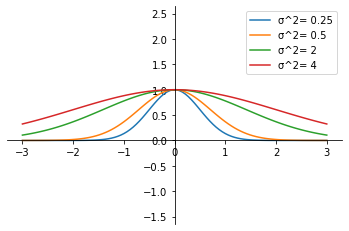

In [6]:
# 100 linearly spaced numbers
x = np.linspace(-3, 3, 100)

fig, ax = plt.subplots()

for sigma_squared in [0.25, 0.5, 2, 4]:
    y = np.exp(- (x ** 2)/ (2 * sigma_squared))
    ax.plot(x, y, label='\u03C3' + "^2= " + str(sigma_squared))

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.axis('equal')
leg = ax.legend();

Thus we can conlude the following: 
$\begin{align}
smaller ~ \sigma ^ 2 ~ \iff rapid~features~decay \iff higher ~ variance \iff ~ more ~ prone ~ to ~ overfitting\\
larger ~ \sigma ^ 2 ~ \iff slower~features~ decay \iff higher ~ bias \iff ~ more ~ prone ~ to ~ underfitting
\end{align}$

## 1.5 SVM VS Logistic Regression
ML practitioners developped certain rules of thumbs to determine the proper tool according to the number of features $n$ and the training dataset's size $m$:
1. $n$ is large relatively to $m$:
Logistic Regression or SVM with a linear Kernel as a complex model is likely to overfit a small dataset.
2. $n$ is small and $m$ is intermediate:
SVM with Gaussian Kernel
3. $n$ is small and $m$ is large:
create or add more complicated features, then use a logistic regression 